In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
class scatter():
    def __init__(self,x,y,ax,size=1,**kwargs):
        self.n = len(x)
        self.ax = ax
        self.ax.figure.canvas.draw()
        self.size_data=size
        self.size = size
        self.sc = ax.scatter(x,y,s=self.size,**kwargs)
        self._resize()
        self.cid = ax.figure.canvas.mpl_connect('draw_event', self._resize)

    def _resize(self,event=None):
        ppd=72./self.ax.figure.dpi
        trans = self.ax.transData.transform
        s =  ((trans((1,self.size_data))-trans((0,0)))*ppd)[1]
        if s != self.size:
            self.sc.set_sizes(s**2*np.ones(self.n))
            self.size = s
            self._redraw_later()
    
    def _redraw_later(self):
        self.timer = self.ax.figure.canvas.new_timer(interval=10)
        self.timer.single_shot = True
        self.timer.add_callback(lambda : self.ax.figure.canvas.draw_idle())
        self.timer.start()

In [44]:
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [112]:
vmin = 1
vmax = 32

circles = np.array([
    [6, 8],
    [13, 22],
    [26, 8],
    [12, 26],
    [20, 7],
    [27, 12],
    [18, 18],
])

rps = np.array([
    [6, 8],
    [15, 20],
    [12, 25],
    [27, 12],
    [23, 7],
])

circle_x = circles[:,0]
circle_y = circles[:,1]

rps_x = rps[:,0]
rps_y = rps[:,1]

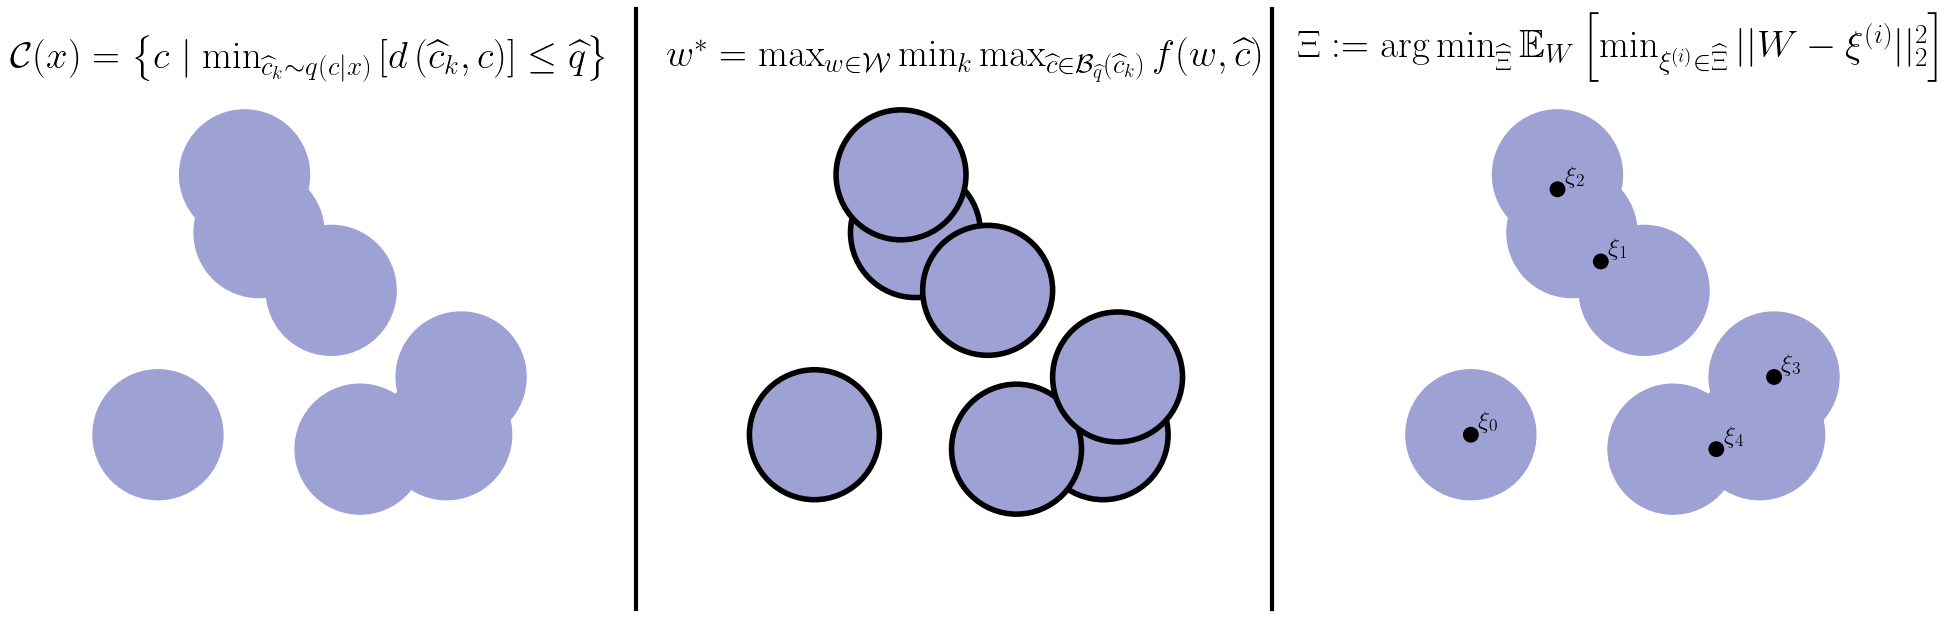

In [116]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,6))

axs[0].set_title(r"$\mathcal{C}(x) = \left\{c \mid \min_{\widehat{c}_k\sim q(c\mid x)}\left[d\left(\widehat{c}_k, c\right) \right] \le \widehat{q} \right\}$", fontsize=28)
scatter(circle_x,circle_y,axs[0],size=9, color="#9EA1D4")

axs[1].set_title(r"$w^{*} = \max_{w\in\mathcal{W}} \min_{k} \max_{\widehat{c} \in \mathcal{B}_{\widehat{q}}(\widehat{c}_{k})} f(w, \widehat{c})$", fontsize=28)
scatter(circle_x,circle_y,axs[1],linewidth=4, size=9, color="#9EA1D4", edgecolors='black')

axs[2].set_title(r"$\Xi := \mathrm{arg}\min_{\widehat{\Xi}} \mathbb{E}_{W}\left[\min_{\xi^{(i)} \in \widehat{\Xi}} || W - \xi^{(i)} ||_2^2 \right]$", fontsize=28)
scatter(circle_x,circle_y,axs[2],size=9, color="#9EA1D4")
scatter(rps_x,rps_y,axs[2],size=1, color="k", edgecolors='black')

for ax in axs:
    ax.set_xlim(vmin - 0.5, vmax + 0.5)
    ax.set_ylim(vmin - 0.5, vmax + 0.5)

    ax.set_aspect(1)
    ax.axis('off')

for i, rp in enumerate(rps):
    ax.annotate(f"$\\xi_{i}$", (rp[0] + 0.5, rp[1] + 0.5))

line = plt.Line2D((.375,.375), (0,1.0), color="k", linewidth=3)
fig.add_artist(line)
line = plt.Line2D((.64,.64), (0,1.0), color="k", linewidth=3)
fig.add_artist(line)
plt.savefig("workflow.png", bbox_inches="tight")